In [8]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
path = "onlinenews.csv"
data = pd.read_csv(path, engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop([' shares'], axis=1)
y = data[' shares']

- Data has 39644 rows and 60 columns.
- Column names:  [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global

데이터 6:2:2 Train valid test 구분

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2015010720)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=2015010720)

# X_valid = scaler.transform(X_valid)

최적 파라미터 조정 없이 학습 및 테스트 진행

In [12]:
clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_test_pred = clf_dt.predict(X_test)

In [13]:
# Show train & validation accuracies
print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))
print('- MSE (test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- MAE (Train)      : {:.4}'.format(mean_absolute_error(y_train, y_train_pred)))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_valid, y_valid_pred))))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- MSE (Train)      : 0.0
- MSE (Validation) : 1.857e+08
- MSE (test) : 3.425e+08
- MAE (Train)      : 0.0
- MAE (Validation) : 4129
- MAE (Validation) : 4422


최적 파라미터 조정 후 테스트 진행

In [14]:
max_depths = list(range(1, 10, 1))
validation_mse = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=max_depth)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_mse.append(mean_squared_error(y_valid, y_valid_pred))

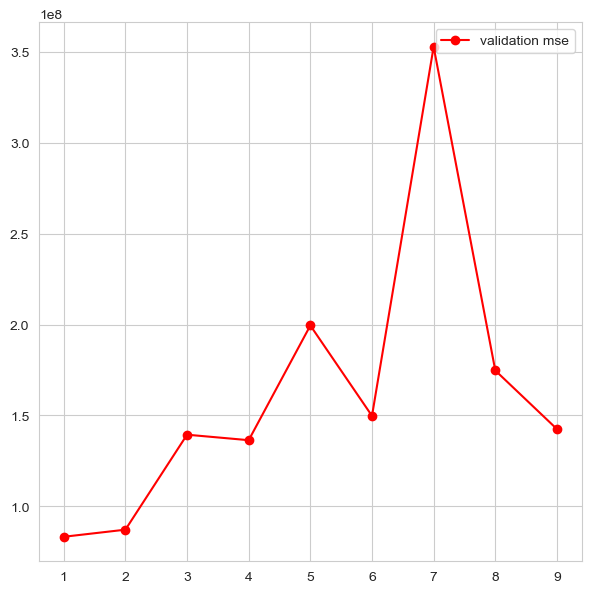

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_mse, color='red', marker='o', label='validation mse')
ax.legend(loc='best')
plt.show(fig)

In [16]:
best_model_idx, best_model_f1 = min(enumerate(validation_mse), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.474e+08
- mae (Test) : 3113


최적 모델 시각화

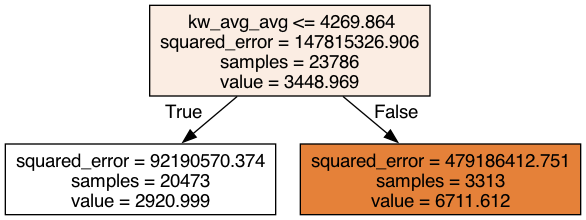

In [17]:
graph = Source(export_graphviz(dt_models[best_model_idx],
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)


모델의 중요변수 선택

In [18]:
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
print(imp[imp['importance'] != 0])

      variables importance
26   kw_avg_avg        1.0


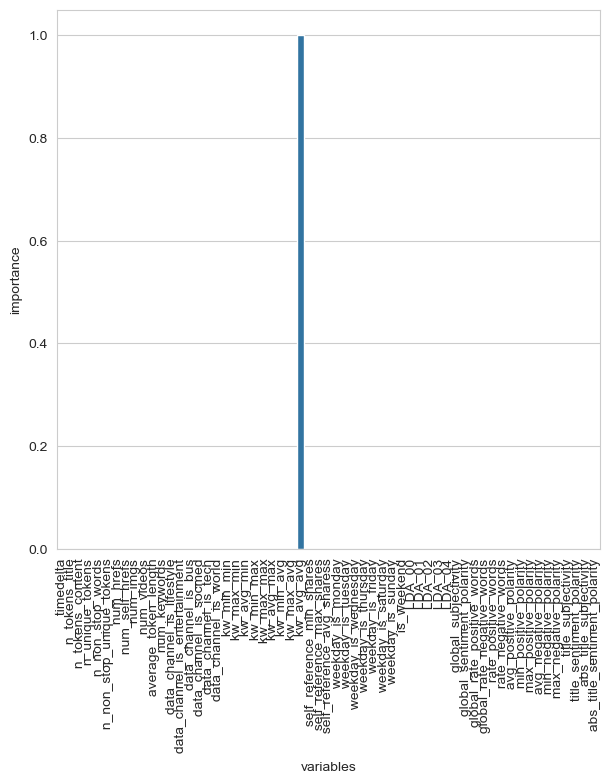

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

더 효과적인 알고리즘 적용

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred_rf)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred_rf))))

- mse (Test) : 1.541e+08
- mae (Test) : 3376


변수 선택 방법 적용 후 의사결정나무 모델 학습 및 테스트

In [22]:
from sklearn.feature_selection import f_regression

In [23]:
f_results = f_regression(X_train, y_train, center=True, force_finite=True)
# 결과를 DataFrame으로 변환
f_values = pd.DataFrame(f_results[0], index=X.columns, columns=['F-value'])
p_values = pd.DataFrame(f_results[1], index=X.columns, columns=['p-value'])
df_f_reg = pd.concat([f_values, p_values], axis=1)

# F-value를 기준으로 내림차순 정렬
df_f_reg_sorted = df_f_reg.sort_values(by=['F-value'], ascending=False)

# 결과 출력
print(df_f_reg_sorted)

                                  F-value       p-value
kw_avg_avg                     326.310749  1.866174e-72
LDA_03                         153.173012  4.502949e-35
kw_max_avg                     120.706014  5.175518e-28
self_reference_min_shares      111.346590  5.670367e-26
self_reference_avg_sharess     106.016346  8.245370e-25
LDA_02                          85.027940  3.179121e-20
self_reference_max_shares       56.492804  5.839424e-14
data_channel_is_world           55.723001  8.630021e-14
kw_avg_max                      46.261675  1.059210e-11
kw_avg_min                      45.502518  1.559400e-11
kw_max_min                      41.298689  1.331315e-10
num_hrefs                       39.353523  3.597054e-10
kw_min_avg                      38.815220  4.736916e-10
avg_negative_polarity           38.126747  6.736808e-10
num_imgs                        27.061437  1.987239e-07
average_token_length            25.464876  4.538286e-07
min_negative_polarity           17.064420  3.625

In [24]:
# 상위 30% 변수 추출
top_30_percent = int(len(df_f_reg_sorted) * 0.3)
top_30_percent_variables = df_f_reg_sorted.head(top_30_percent).index.tolist()


In [25]:
top_30_percent_variables

[' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' self_reference_min_shares',
 ' self_reference_avg_sharess',
 ' LDA_02',
 ' self_reference_max_shares',
 ' data_channel_is_world',
 ' kw_avg_max',
 ' kw_avg_min',
 ' kw_max_min',
 ' num_hrefs',
 ' kw_min_avg',
 ' avg_negative_polarity',
 ' num_imgs',
 ' average_token_length',
 ' min_negative_polarity']

In [26]:
# X_train에서 상위 30% 변수만 선택하여 새로운 배열 생성
X_train_selected = X_train[top_30_percent_variables]
X_valid_selected = X_valid[top_30_percent_variables]
X_test_selected = X_test[top_30_percent_variables]

In [27]:
max_depths = list(range(1, 10, 1))
validation_mse = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=max_depth)
    clf_dt.fit(X_train_selected, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid_selected)
    validation_mse.append(mean_squared_error(y_valid, y_valid_pred))

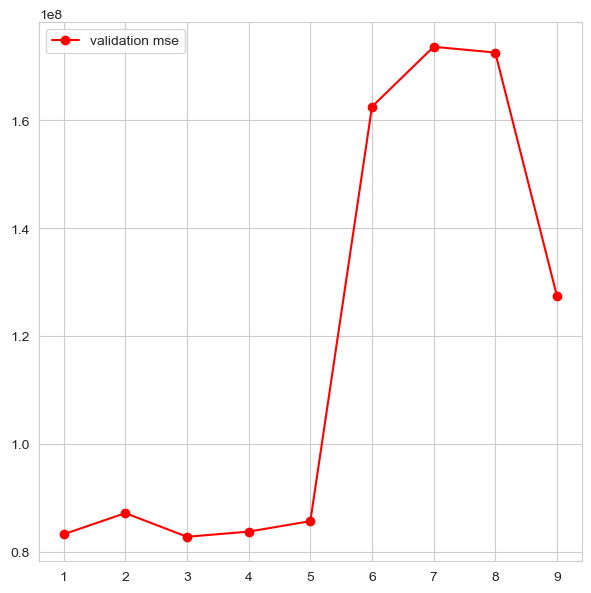

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_mse, color='red', marker='o', label='validation mse')
ax.legend(loc='best')
plt.show(fig)

In [29]:
best_model_idx, best_model_f1 = min(enumerate(validation_mse), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test_selected)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.461e+08
- mae (Test) : 3048


변수 선택 방법 적용 후 Random Forest 모델 학습 및 테스트

In [30]:
rf = RandomForestRegressor(n_estimators=50)

In [31]:
rf.fit(X_train_selected, y_train)

RandomForestRegressor(n_estimators=50)

In [32]:
y_test_pred_rf = rf.predict(X_test_selected)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred_rf)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred_rf))))

- mse (Test) : 1.553e+08
- mae (Test) : 3411


y값('shares' 컬럼)의 분포를 box plot

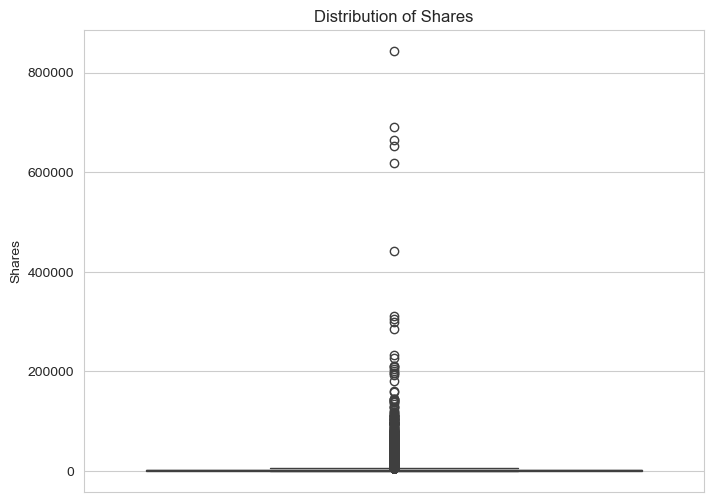

In [33]:
# y값('shares') 분포를 box plot으로 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(y=y)  # y값을 이용하여 box plot 생성
plt.title('Distribution of Shares')  # 그래프 제목 설정
plt.ylabel('Shares')  # y축 레이블 설정
plt.show()  # 그래프 출력

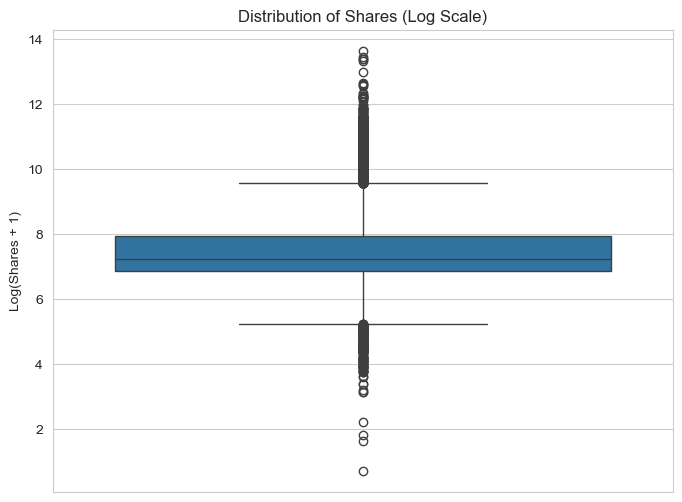

In [34]:
# y값('shares') 분포를 로그 스케일로 box plot으로 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(y=np.log1p(y))  # y값에 로그 변환 적용하여 box plot 생성
plt.title('Distribution of Shares (Log Scale)')  # 그래프 제목 설정
plt.ylabel('Log(Shares + 1)')  # y축 레이블 설정
plt.show()  # 그래프 출력

1. 극단값(Outlier)의 영향 완화:

원본 데이터는 극단적으로 큰 값들이 존재하여 모델 학습 시 이 값들이 손실함수나 분할 기준에 큰 영향을 미치게 됩니다.
로그 변환(log-scale)은 큰 값의 간격을 축소하여 극단적인 값의 영향을 줄여줍니다.
따라서 트리가 더 균형적이고 안정적으로 데이터의 패턴을 학습할 수 있습니다.

2. 데이터의 분포 개선:
원본 분포는 극히 편향된(skewed) 형태로, 작은 수치가 대부분이고 일부 값이 매우 큰 형태로 되어 있습니다.
로그 변환 후에는 데이터 분포가 보다 정규분포(normal distribution)에 가까워져 의사결정 나무가 더 효과적으로 데이터를 분할하고 패턴을 파악할 수 있습니다.

3. 분산(Variance) 감소 및 모델 안정성 증가:
로그 변환을 통해 데이터의 수치 범위가 축소되면서 데이터의 변동성(variance)이 줄어듭니다.
이로 인해 과적합(overfitting)이 감소하고 일반화(generalization) 성능이 향상됩니다.

4. 더 효율적인 분할(split) 수행:
원본 데이터의 극단적인 값은 의사결정나무의 분할 과정에서 최적의 분할 기준을 선택하는 데 어려움을 줍니다.
로그 변환 이후 분할 시 더욱 세부적으로 데이터를 구분하여 더 명확한 의사결정을 할 수 있게 됩니다.


결론
결과적으로, 로그 변환은 데이터 내의 극단값의 영향력을 줄이고 데이터의 특성을 보다 잘 반영할 수 있는 형태로 변환함으로써, 모델의 예측력과 평가 성능을 현저히 향상시킨 것입니다.

In [35]:
# y값을 로그 변환
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)
y_test_log = np.log1p(y_test)

In [36]:
max_depths = list(range(1, 10, 1))
validation_mse = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=max_depth)
    clf_dt.fit(X_train, y_train_log)
    dt_models.append(clf_dt)
    y_valid_log_pred = clf_dt.predict(X_valid)
    validation_mse.append(mean_squared_error(y_valid_log, y_valid_log_pred))

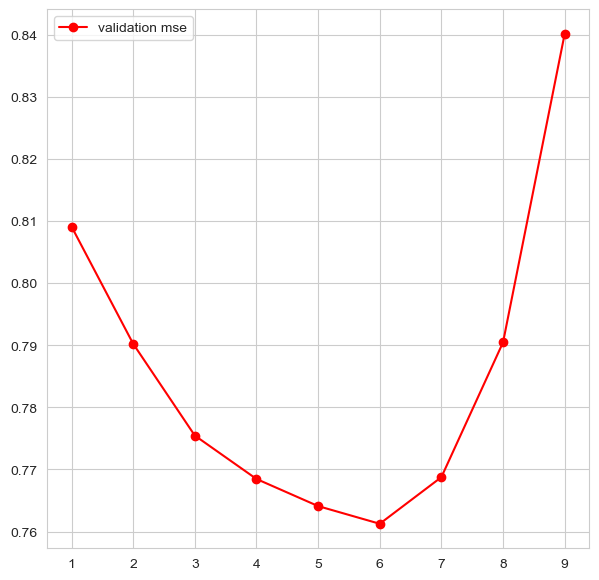

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_mse, color='red', marker='o', label='validation mse')
ax.legend(loc='best')
plt.show(fig)

In [38]:
best_model_idx, best_model_f1 = min(enumerate(validation_mse), key=lambda p: p[1])
y_test_pred_log = dt_models[best_model_idx].predict(X_test)

In [39]:
# 원래 스케일로 변환하여 평가
y_test_pred = np.expm1(y_test_pred_log)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.542e+08
- mae (Test) : 2411


더 효과적인 알고리즘 적용

In [40]:
rf = RandomForestRegressor(n_estimators=50)

In [41]:
rf.fit(X_train, y_train_log)

RandomForestRegressor(n_estimators=50)

In [42]:
y_test_pred_log = rf.predict(X_test)

In [43]:
# 원래 스케일로 변환하여 평가
y_test_pred = np.expm1(y_test_pred_log)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.479e+08
- mae (Test) : 2376


로그 스케일 기반 변수 추출후 Random forest 적용후 평가

In [44]:
f_results = f_regression(X_train, y_train_log, center=True, force_finite=True)
# 결과를 DataFrame으로 변환
f_values = pd.DataFrame(f_results[0], index=X.columns, columns=['F-value'])
p_values = pd.DataFrame(f_results[1], index=X.columns, columns=['p-value'])
df_f_reg = pd.concat([f_values, p_values], axis=1)

# F-value를 기준으로 내림차순 정렬
df_f_reg_sorted = df_f_reg.sort_values(by=['F-value'], ascending=False)

# 결과 출력
print(df_f_reg_sorted)

                                   F-value        p-value
kw_avg_avg                     1318.579982  4.814205e-281
LDA_02                          684.567029  8.650287e-149
data_channel_is_world           559.980165  2.204861e-122
LDA_03                          400.067307   2.834344e-88
is_weekend                      327.434357   1.070385e-72
kw_max_avg                      316.508648   2.385422e-70
kw_min_avg                      282.789828   4.289545e-63
num_hrefs                       235.733251   6.014947e-53
num_imgs                        178.352464   1.553315e-40
self_reference_avg_sharess      177.902697   1.944185e-40
weekday_is_sunday               161.164822   8.291915e-37
data_channel_is_entertainment   149.661586   2.606812e-34
weekday_is_saturday             140.944262   2.043323e-32
data_channel_is_socmed          133.043477   1.067638e-30
self_reference_max_shares       131.922243   1.872186e-30
self_reference_min_shares       125.818277   3.987890e-29
global_subject

In [45]:
# 상위 50% 변수 추출
top_30_percent = int(len(df_f_reg_sorted) * 0.5)
top_30_percent_variables = df_f_reg_sorted.head(top_30_percent).index.tolist()


In [46]:
# X_train에서 상위 30% 변수만 선택하여 새로운 배열 생성
X_train_selected = X_train[top_30_percent_variables]
X_valid_selected = X_valid[top_30_percent_variables]
X_test_selected = X_test[top_30_percent_variables]

In [47]:
max_depths = list(range(1, 10, 1))
validation_mse = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=max_depth)
    clf_dt.fit(X_train_selected, y_train_log)
    dt_models.append(clf_dt)
    y_valid_log_pred = clf_dt.predict(X_valid_selected)
    validation_mse.append(mean_squared_error(y_valid_log, y_valid_log_pred))

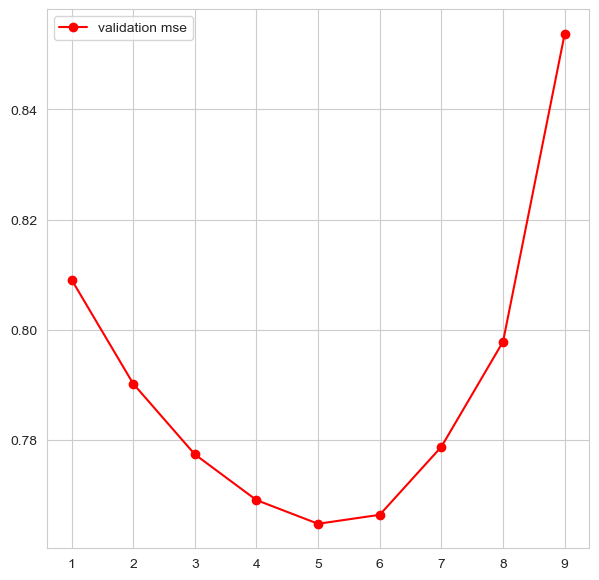

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_mse, color='red', marker='o', label='validation mse')
ax.legend(loc='best')
plt.show(fig)

In [49]:
best_model_idx, best_model_f1 = min(enumerate(validation_mse), key=lambda p: p[1])
y_test_pred_log = dt_models[best_model_idx].predict(X_test_selected)

In [50]:
# 원래 스케일로 변환하여 평가
y_test_pred = np.expm1(y_test_pred_log)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.487e+08
- mae (Test) : 2386


In [51]:
rf = RandomForestRegressor(n_estimators=50)

In [52]:
rf.fit(X_train_selected, y_train_log)

RandomForestRegressor(n_estimators=50)

In [53]:
y_test_pred_log = rf.predict(X_test_selected)

In [54]:
# 원래 스케일로 변환하여 평가
y_test_pred = np.expm1(y_test_pred_log)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- mse (Test) : 1.478e+08
- mae (Test) : 2374


In [55]:
rf2 = RandomForestRegressor(n_estimators=100)

In [56]:
rf2.fit(X_train_selected, y_train_log)

RandomForestRegressor()

In [57]:
y_test_pred_log2 = rf2.predict(X_test_selected)

In [58]:
# 원래 스케일로 변환하여 평가
y_test_pred2 = np.expm1(y_test_pred_log2)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred2)))
print('- mae (Test) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred2))))

- mse (Test) : 1.478e+08
- mae (Test) : 2365


1. Data 전처리1 (더 의미있는 데이터셋 구성) = log sacling

2. Data 전처리2 (더 의미있는 데이터셋 구성) = 변수 선택

3. 알고리즘 개선  = Random Forest

4. what is Next >>??